In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, binning as bn, healpy as hp
from matplotlib.pyplot import *

In [2]:
p0 = prjlib.init_analysis(wtype='Lmask',ascale=1.0)
p1 = prjlib.init_analysis(wtype='Lmask',ascale=1.0,dtype='dr2_nilc')
#pt = prjlib.init_analysis(wtype='Lmask',ascale=1.0,tausig=True)
P0 = prjlib.init_analysis(wtype='Lmask',fltr='cinv')
P1 = prjlib.init_analysis(wtype='Lmask',fltr='cinv',dtype='dr2_nilc')
P2 = prjlib.init_analysis(wtype='LmaskDR3',fltr='cinv',dtype='dr3_nosz')
P3 = prjlib.init_analysis(wtype='G60Lmask',fltr='cinv')

## CMB spectra

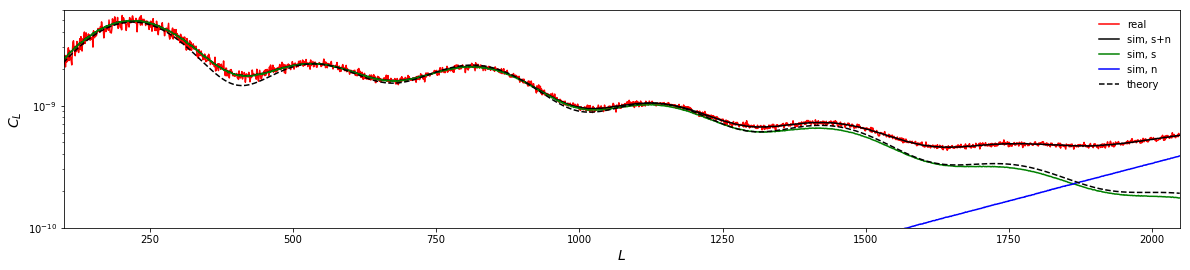

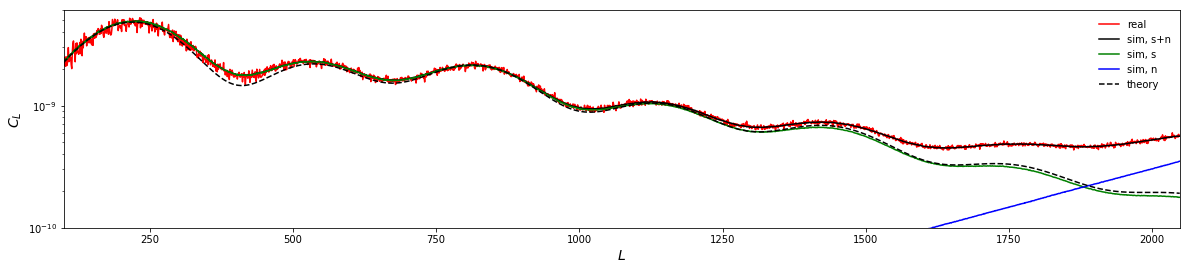

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


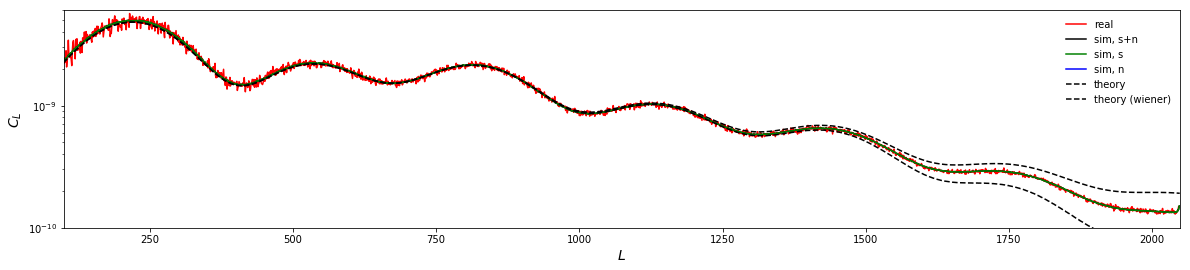

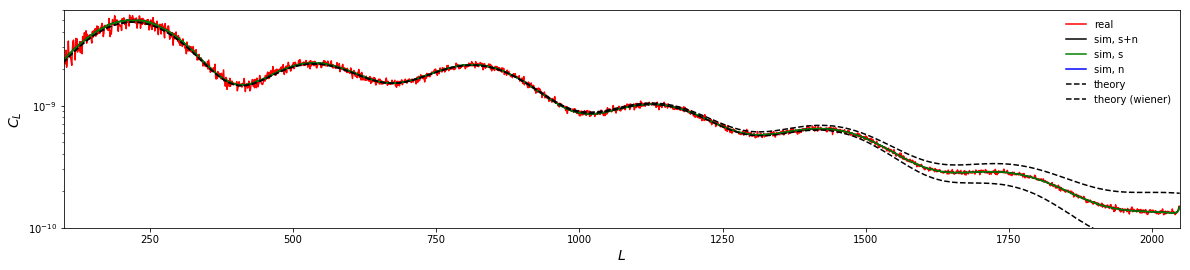

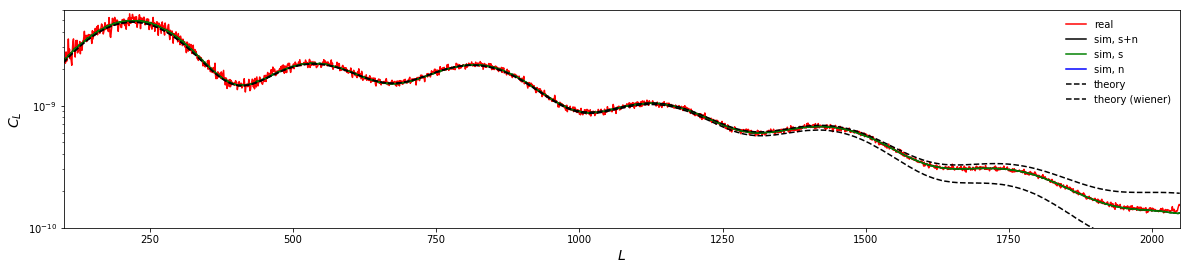

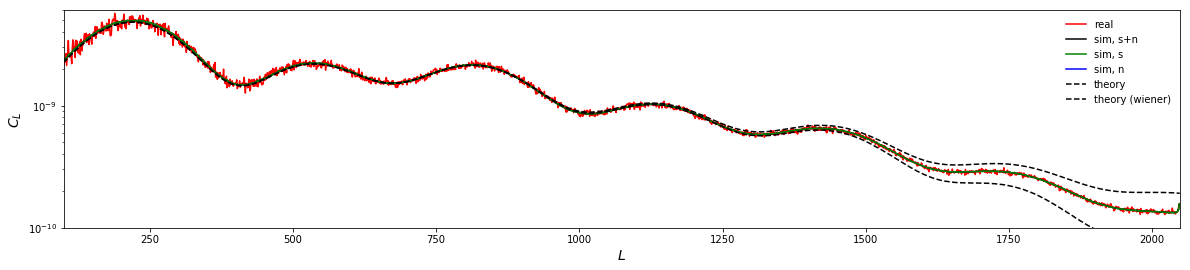

<Figure size 1440x288 with 0 Axes>

In [3]:
rcl, scl, ncl, ocl, vcl = {}, {}, {}, {}, {}
for i, pobj in enumerate([p0,p1,P0,P1,P2,P3]):
    pl.plot_1dstyle(fsize=[20,4],ymin=1e-10,ymax=6e-9,xmin=100,ylog=True,xmax=2048)
    l, rcl[i] = np.loadtxt(pobj.fcmb.ocl,unpack=True,usecols=(0,1))
    l, scl[i], ncl[i], ocl[i], vcl[i] = np.loadtxt(pobj.fcmb.scl,unpack=True,usecols=(0,1,2,4,8))
    plot(l,l**2*rcl[i],'r-',label='real')
    plot(l,l**2*ocl[i],'k-',label='sim, s+n')
    plot(l,l**2*scl[i],'g',label='sim, s')
    plot(l,l**2*ncl[i],'b',label='sim, n')
    plot(l,l**2*pobj.lcl[0],'k--',label='theory')
    if pobj.fltr=='cinv':
        noise = np.loadtxt(p0.fcmb.scl,unpack=True)[2]
        plot(l,l**2*p0.lcl[0]**2/(p0.lcl[0]+noise),'k--',label='theory (wiener)')
    legend()
    show()
    clf()

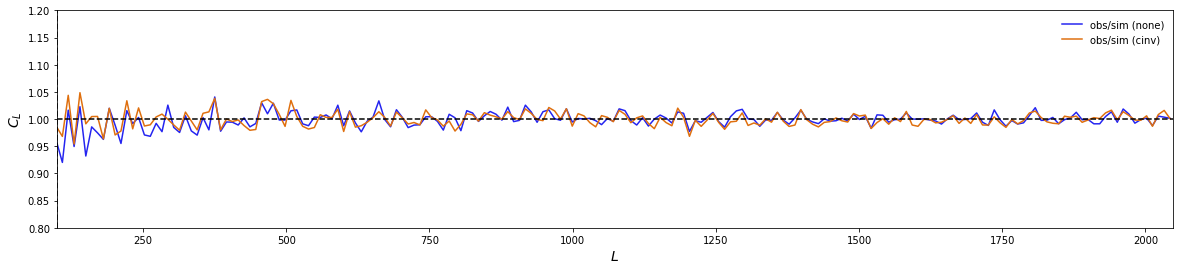

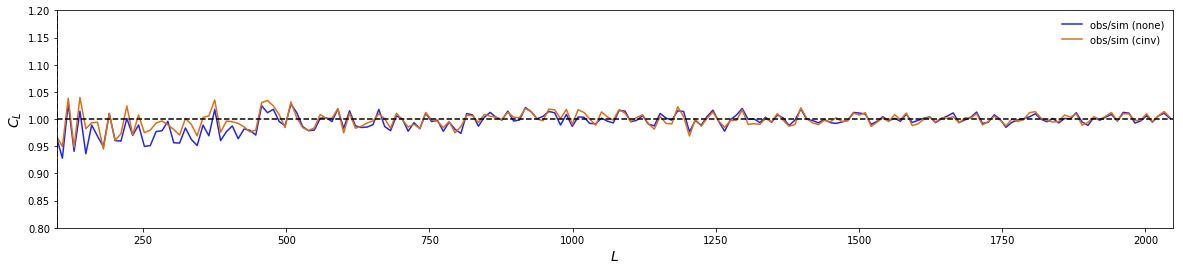

In [4]:
mb = bn.multipole_binning(200,lmin=2,lmax=2048)
for i in range(2):
    pl.plot_1dstyle(fsize=[20,4],ymin=.8,ymax=1.2,xmin=100,xmax=2048)
    rcb0 = bn.binning(rcl[i],mb)
    rcb2 = bn.binning(rcl[i+2],mb)
    ocb0 = bn.binning(ocl[i],mb)
    ocb2 = bn.binning(ocl[i+2],mb)
    plot(mb.bc,rcb0/ocb0,label='obs/sim (none)')
    plot(mb.bc,rcb2/ocb2,label='obs/sim (cinv)')
    axhline(1,ls='--',color='k')
    axvline(100,ls='--',color='k')
    legend()
    show()

Rlz

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


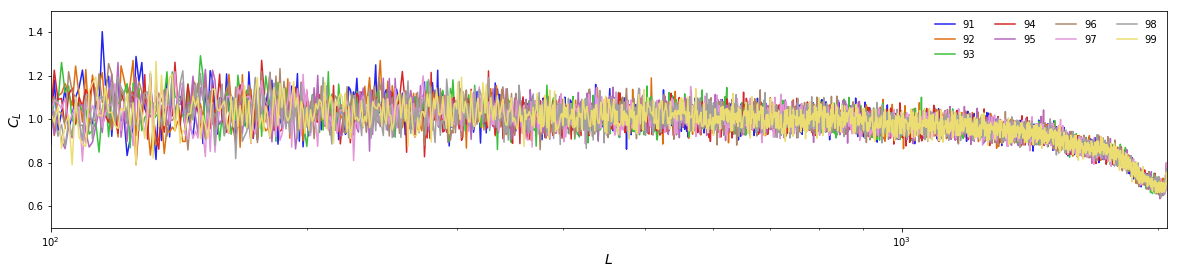

In [5]:
pl.plot_1dstyle(fsize=[20,4],xmin=100,xmax=2048,ymin=0.5,ymax=1.5,xlog=True)
for i in range(91,100):
    ci = np.loadtxt(P1.fcmb.cl[i],unpack=True)[1]
    plot(p0.l,ci/p0.lcl[0],label=str(i))
legend(ncol=4)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


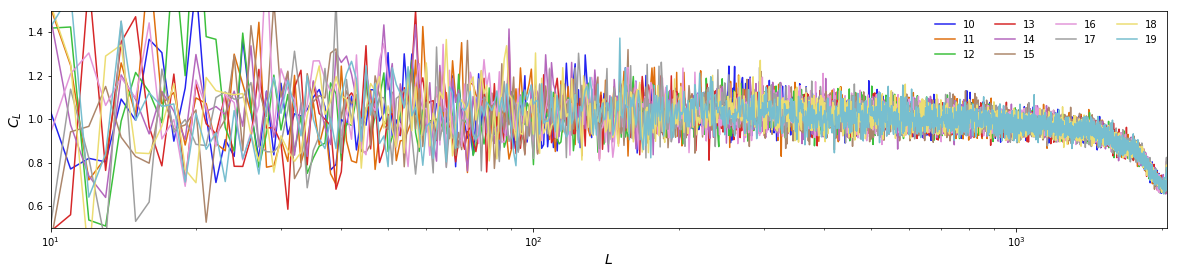

In [6]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=2048,ymin=0.5,ymax=1.5,xlog=True)
for i in range(10,20):
    ci = np.loadtxt(P0.fcmb.cl[i],unpack=True)[1]
    plot(p0.l,ci/p0.lcl[0],label=str(i))
legend(ncol=4)

Gaussianity

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


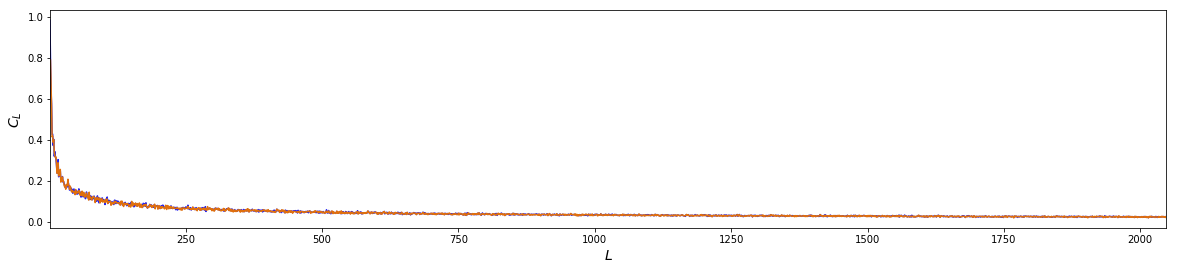

In [7]:
pl.plot_1dstyle(fsize=[20,4],xmin=2,xmax=2048)
plot(l,vcl[0]/ocl[0])
plot(l,vcl[2]/ocl[2])

## Beam

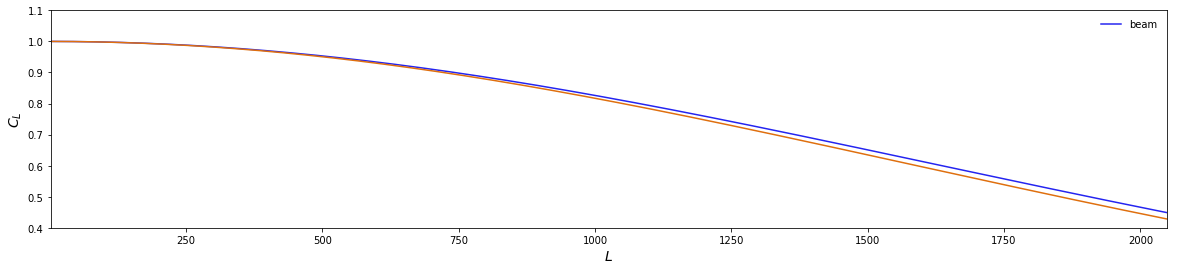

In [8]:
def beam():
    pl.plot_1dstyle(fsize=[20,4],ymin=.4,ymax=1.1,xmin=2,xmax=2048)
    bl = np.loadtxt(p0.fbeam)[:p0.lmax+1]
    pix = hp.sphtfunc.pixwin(2048)[:2049]
    l = np.linspace(0,2048,2049)
    plot(l,bl,label='beam')
    plot(l,pix*np.exp(-l*(l+1)*(np.pi*5./10800.)**2/(16.*np.log(2.))))
    legend()
beam()

## Pixel function

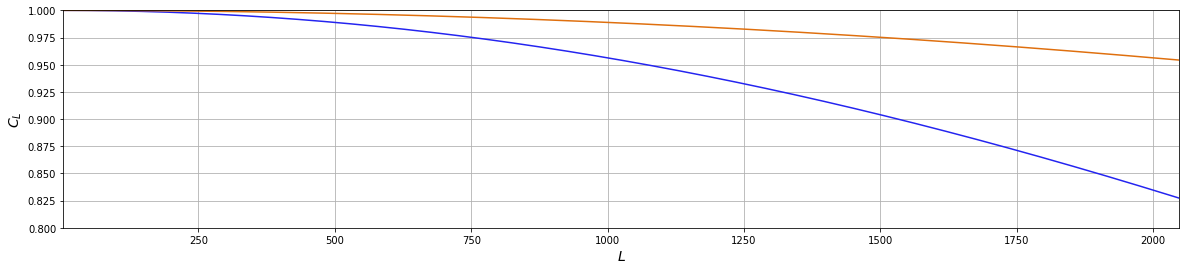

In [9]:
def pixfunc():
    pl.plot_1dstyle(fsize=[20,4],ymin=.8,ymax=1,xmin=2,xmax=2048,grid=True)
    pf1024 = hp.sphtfunc.pixwin(1024)[:2049]
    pf2048 = hp.sphtfunc.pixwin(2048)[:2049]
    plot(pf1024)
    plot(pf2048)
pixfunc()

## Approximate noise level

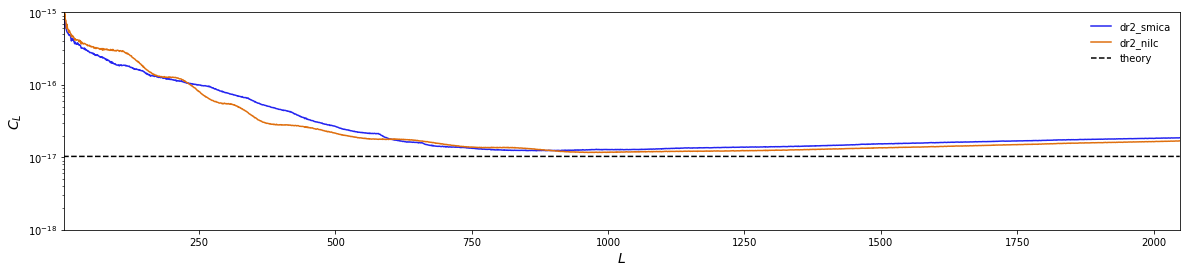

In [10]:
pl.plot_1dstyle(fsize=[20,4],ymin=1e-18,ymax=1e-15,xmin=2,ylog=True,xmax=2048)
for pobj in [p0,p1]:
    bl = np.loadtxt(pobj.fbeam)[:p0.lmax+1]
    l, ncl = np.loadtxt(pobj.fcmb.scl,unpack=True,usecols=(0,2))
    plot(l,ncl*bl**2,label=pobj.dtype)
nlev = (30.*np.pi/10800./2.72e6)**2
plot(l,np.ones(len(l))*nlev,'k--',label='theory')
legend()

## Point source spectrum

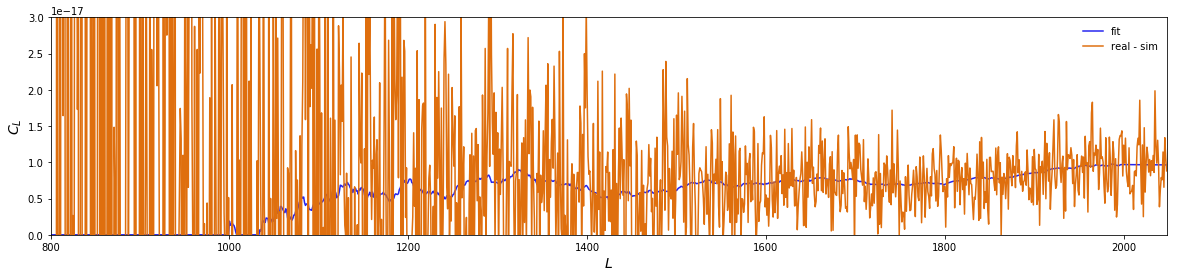

In [11]:
def ptsr_fit():
    pl.plot_1dstyle(fsize=[20,4],ymin=1e-30,ymax=3e-17,xmin=800,xmax=2048)
    l, dcl, dCL = np.loadtxt(p0.fptsrcl,unpack=True)
    plot(l,dcl,label='fit')
    plot(l,dCL,label='real - sim')
    legend()
ptsr_fit()

In [12]:
def ptsr_sim(pobj):
    pl.plot_1dstyle(fsize=[20,4],ymin=1e-30,ymax=3e-17,xmin=800,xmax=2048)
    l, dcl = np.loadtxt(pobj.fptsrcl,unpack=True,usecols=(0,1))
    l, cpp = np.loadtxt(pobj.fcmb.scl,unpack=True,usecols=(0,3))
    plot(l,dcl,label='fit')
    plot(l,cpp,label='sim')
    legend()

In [16]:
#ptsr_sim(p0)

## Filter

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


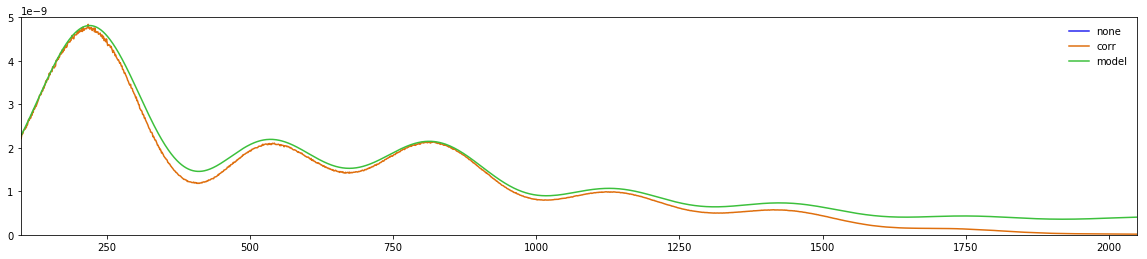

In [14]:
xlim(100,2048)
ylim(0,5e-9)
obs = p0.lcl[0] + nlev/bl**2
Fl = ocl[1]/p0.lcl[0]**2
Ql = Fl*obs
#alpha = xcl1/p.lcl[0,:]
ocl = ocl[1]/Ql**2
plot(l,l**2*ocl[0],label='none')
plot(l,l**2*ocl,label='corr')
plot(l,l**2*obs,label='model')
legend()

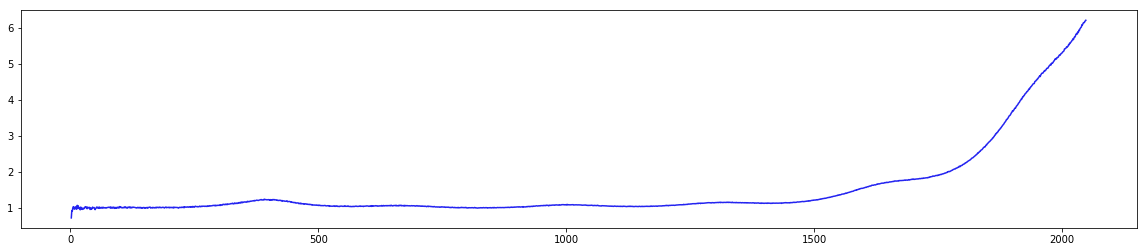

In [15]:
plot(Ql)